<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API  


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

</div>

<hr>


<h2 id="PandasAPI">Pandas is an API </h2>


You will use this function in the lab:


In [1]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict    

<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

You create a dictionary, this is just data.


In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%206/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


<p>Rest API’s function by sending a <b>request</b>,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API do the determined number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API is relatively will handle a lot of the details such a Endpoints and Authentication </p>


In the nba api to make a request for a specific team, it's quite simple, we don't require a JSON all we require is an id. This information is stored locally in the API we import the module teams 


In [7]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

The method <code>get_teams()</code> returns a list of dictionaries  the dictionary key id has a unique identifier for each team as a value 


In [8]:
nba_teams = teams.get_teams()

The dictionary key id has a unique identifier for each team as a value, let's look at the first three elements of the list:


In [9]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys,  the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.


In [10]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()
df_teams.nickname.unique()

array(['Hawks', 'Celtics', 'Cavaliers', 'Pelicans', 'Bulls', 'Mavericks',
       'Nuggets', 'Warriors', 'Rockets', 'Clippers', 'Lakers', 'Heat',
       'Bucks', 'Timberwolves', 'Nets', 'Knicks', 'Magic', 'Pacers',
       '76ers', 'Suns', 'Trail Blazers', 'Kings', 'Spurs', 'Thunder',
       'Raptors', 'Jazz', 'Grizzlies', 'Wizards', 'Pistons', 'Hornets'],
      dtype=object)

Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:


In [11]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

df_lakers=df_teams[df_teams['nickname']=='Lakers']
df_lakers

,id,full_name,abbreviation,nickname,city,state,year_founded
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948


we can use the following line of code to access the first column of the dataframe:


In [12]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors
id_lakers=df_lakers[['id']].values[0][0]
#we now have an integer that can be used   to request the lakers information 
id_lakers

1610612747

The function "League Game Finder " will make an API call, its in the module <code>stats.endpoints</code> 


In [13]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.  
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.


In [14]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
lakers_gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_lakers)

we can see the json file by running the following line of code. 


In [15]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative the Warriors lost by that many points, if the value is positive, the warriors one by that amount of points. The column <code>MATCHUP </code>had the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors; <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.


In [16]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
games = gamefinder.get_data_frames()[0]
games = lakers_gamefinder.get_data_frames()[0]
display(games.head(5))
games = games[games['SEASON_ID'].str.contains('22020|22019')]
# display(games.SEASON_ID)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612747,LAL,Los Angeles Lakers,1522400050,2024-07-18,LAL @ CLE,W,200,93,...,0.759,8,32,40,19,3,3,13,21,1.2
1,22024,1610612747,LAL,Los Angeles Lakers,1522400044,2024-07-17,LAL @ ATL,W,200,87,...,0.667,11,25,36,23,10,2,14,25,-4.6
2,22024,1610612747,LAL,Los Angeles Lakers,1522400029,2024-07-15,LAL vs. BOS,L,200,74,...,0.833,14,21,35,17,9,5,17,21,-14.0
3,22024,1610612747,LAL,Los Angeles Lakers,1522400004,2024-07-12,LAL vs. HOU,L,201,80,...,0.615,11,29,40,20,7,7,14,21,-18.6
4,22024,1610612747,LAL,Los Angeles Lakers,1322400011,2024-07-10,LAL vs. MIA,None,26,9,...,NaN,1,1,2,5,1,0,7,3,1.4


you can download the dataframe from the API call for Golden State and run the rest like a video.


In [17]:
# ! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

In [18]:
# file_name = "Golden_State.pkl"
# games = pd.read_pickle(file_name)
# games.head()

We can create two dataframes, one  for the games that the Warriors faced the raptors at home and the second for away games.


In [19]:
games_home = games [games ['MATCHUP'].str.contains('vs.')].iloc[::-1]
games_away = games [games['MATCHUP'].str.contains('@')].iloc[::-1]

We can calculate the mean for the column  <code>PLUS_MINUS</code> for the dataframes  <code>games_home</code> and <code> games_away</code>:


In [20]:
games_home['PLUS_MINUS'].mean(), games_away['PLUS_MINUS'].mean()

(4.662162162162162, 2.4883116883116885)

We can plot out the <code>PLUS MINUS</code> column for  for the dataframes  <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.


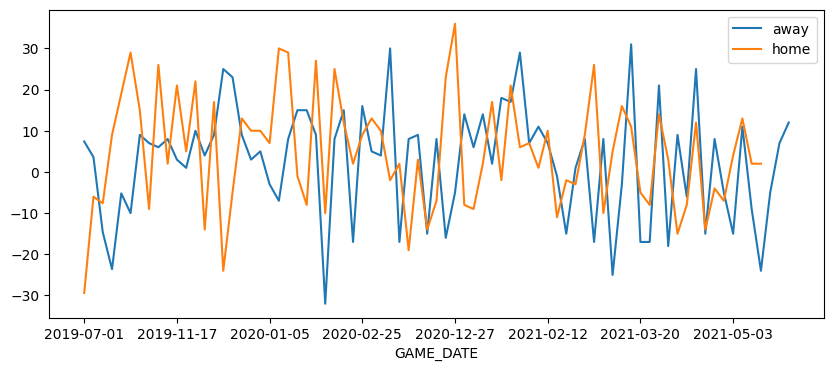

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

<h2>Quiz</h2>


Calculate the mean for the column  <code>PTS</code> for the dataframes  <code>games_home</code> and <code> games_away</code>:


In [22]:
# Write your code below and press Shift+Enter to execute
print(games_home['PTS'].mean(), games_away['PTS'].mean())

111.37837837837837 109.14285714285714


<details><summary>Click here for the solution</summary>

```python
games_home.mean()['PTS']

games_away.mean()['PTS']

```

</details>


## Authors:

 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) 

Joseph Santarcangelo has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
